## Instructions

This sample code demonstrate how the function "barotropic_eqlat_lwa" in thepython package "hn2016_falwa" computes the finite-amplitude local wave activity 
(LWA) from absolute vorticity fields in a barotropic model with spherical geometry according to the definition in Huang & Nakamura (2016,JAS) equation (13). This 
sample code reproduces the LWA plots (Fig.4 in HN15) computed based on an absolute vorticity map.

## Contact

Please make inquiries and report issues via Github: https://github.com/csyhuang/hn2016_falwa/issues

In [1]:

from math import pi
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# --- Parameters --- #
Earth_radius = 6.378e+6 # Earth's radius

# --- Load the absolute vorticity field [256x512] --- #
readFile = Dataset('../../examples/simple/barotropic_vorticity.nc', mode='r')

# --- Read in longitude and latitude arrays --- #
xlon = readFile.variables['longitude'][:]
ylat = readFile.variables['latitude'][:]
clat = np.abs(np.cos(ylat*pi/180.)) # cosine latitude
nlon = xlon.size
nlat = ylat.size

# --- Parameters needed to use the module HN2015_LWA --- #
dphi = (ylat[2]-ylat[1])*pi/180. # Equal spacing between latitude grid points, in radian
area = 2.*pi*Earth_radius**2 *(np.cos(np.deg2rad(ylat[:,np.newaxis]))*dphi)/float(nlon) * np.ones((nlat,nlon))
area = np.abs(area) # To make sure area element is always positive (given floating point errors). 

# --- Read in the absolute vorticity field from the netCDF file --- #
absVorticity = readFile.variables['absolute_vorticity'][:].data
readFile.close()



In [2]:
xlon.shape

(512,)

## Obtain equivalent-latitude relationship and also the LWA from an absolute vorticity snapshot

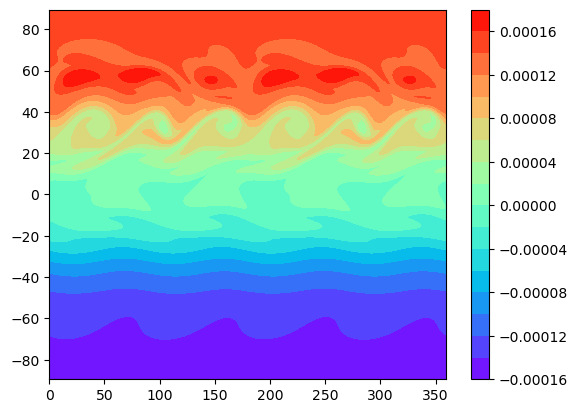

In [3]:
plt.contourf(xlon, ylat, absVorticity, 21, cmap='rainbow')
plt.colorbar()

In [4]:
from hn2016_falwa.basis import eqvlat_fawa

qref, fawa = eqvlat_fawa(xlon=xlon,
    ylat=ylat, vort=absVorticity, area=area, n_points=nlat,
    equator_idx=61, dp=dphi, clat=np.cos(np.deg2rad(ylat)), planet_radius=6.378e+6)

y_part = [-1.         -0.9932668  -0.98595446 -0.97883656 -0.97112353 -0.96333939
 -0.95479804 -0.94577806 -0.93605758 -0.92526172 -0.91373933 -0.90107689
 -0.88711908 -0.87279235 -0.85835633 -0.84438802 -0.83101124 -0.81822884
 -0.80631883 -0.79434459 -0.78363823 -0.77291298 -0.76338504 -0.75358083
 -0.74415311 -0.73509548 -0.72620311 -0.71766028 -0.7092801  -0.70114476
 -0.69357138 -0.68642852 -0.67898017 -0.67164626 -0.6645049  -0.65748054
 -0.65116706 -0.64450213 -0.63791267 -0.63176214 -0.62540152 -0.61924398
 -0.61326999 -0.60740715 -0.60119864 -0.59532209 -0.5897579  -0.5840815
 -0.57849076 -0.57292523 -0.56707149 -0.56194232 -0.55602807 -0.55086046
 -0.54516675 -0.53992106 -0.53449612 -0.52925164 -0.52398552 -0.51865869
 -0.51335331 -0.50827308 -0.50276533 -0.49789671 -0.49235126 -0.48743806
 -0.48165511 -0.47665816 -0.47122503 -0.46606182 -0.46060093 -0.45548395
 -0.44982535 -0.44467172 -0.43898266 -0.43366763 -0.42833024 -0.42268671
 -0.41778877 -0.41151606 -0.40645747 -0.400

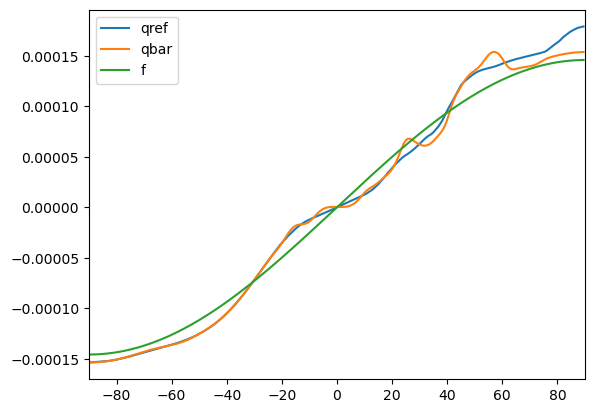

In [5]:
plt.plot(ylat, qref, label='qref')
plt.plot(ylat, absVorticity.mean(axis=-1), label='qbar')
plt.plot(ylat, 2 * 7.29e-5 * np.sin(np.deg2rad(ylat)), label='f')
plt.xlim([-90, 90])
plt.legend()

(0.0, 10.508992545968285)

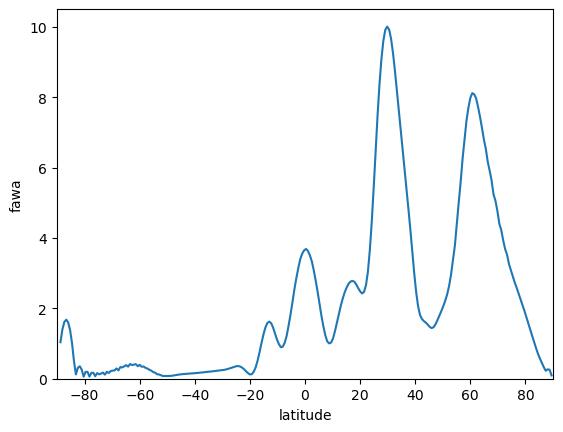

In [6]:
plt.plot(ylat[1:], fawa, label='fawa')
plt.xlim([-90, 90])
plt.xlabel('latitude')
plt.ylabel('fawa')
plt.gca().set_ylim(bottom=0)